Task 2: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from scipy.stats import zscore
import scipy
from scipy.stats import shapiro,chi2,normaltest,kstest
import scipy.stats as stats
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv(r"C:\Users\Akash\Desktop\IT Vedant\Diving Into world of data (DWD)\Datasets\titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### DATA STUDY AND OVERVIEW

In [7]:
# Basic stats
print(f"Shape :",df.shape)
print("_"*30)
print(f"Size :",df.size)
print("_"*30)
print(f"Columns :",df.columns)
print("_"*30)
print(f"Rows :",df.index)
print("_"*30)
print(f"information :",df.info())
print("_"*30)

Shape : (891, 12)
______________________________
Size : 10692
______________________________
Columns : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
______________________________
Rows : RangeIndex(start=0, stop=891, step=1)
______________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non

#### Extracting Numerical and Categorical Columns

In [8]:
df.drop("Name",inplace=True,axis=1)

In [9]:
num_cols = df.select_dtypes(include=['int', 'float'])
cat_cols = df.select_dtypes(include=['object'])

#### CONVERTING DATATYPES FROM OBJECT TO NUMERICAL

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [12]:
df["Ticket"] = le.fit_transform(df["Ticket"])

In [13]:
df["Cabin"] = le.fit_transform(df["Cabin"])

In [14]:
df["Embarked"] = le.fit_transform(df["Embarked"])

In [15]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Gender           int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### NUMERICAL COLUMN ANALYSIS

In [17]:
for col in num_cols:
    print("*"*30)
    print(f"\n{col} Analysis")
    print("_"*30)
    print(f"Mean:", df[col].mean())
    print(f"Median:", df[col].median())
    print(f"Mode:", df[col].mode()[0])
    print(f"Variance:{df[col].var()}")
    print(f"Standard Deviation:{df[col].std()}")
    print(f"Data_Range:{df[col].max() - df[col].min()}")
    print(f"Skewness :", df[col].skew())

    print("*"*30)

******************************

PassengerId Analysis
______________________________
Mean: 446.0
Median: 446.0
Mode: 1
Variance:66231.0
Standard Deviation:257.3538420152301
Data_Range:890
Skewness : 0.0
******************************
******************************

Survived Analysis
______________________________
Mean: 0.38608305274971944
Median: 0.0
Mode: 0
Variance:0.23728924702707258
Standard Deviation:0.4871234412621431
Data_Range:1
Skewness : 0.4687650754421994
******************************
******************************

Pclass Analysis
______________________________
Mean: 2.308641975308642
Median: 3.0
Mode: 3
Variance:0.6990151199889065
Standard Deviation:0.8360712409770513
Data_Range:2
Skewness : -0.6305479068752845
******************************
******************************

Age Analysis
______________________________
Mean: 29.69911764705882
Median: 28.0
Mode: 24.0
Variance:211.0191247463081
Standard Deviation:14.526497332334044
Data_Range:79.58
Skewness : 0.3891077823008270

#### VISUAL DISTRIBUTION OF NUMERICAL COLUMNS

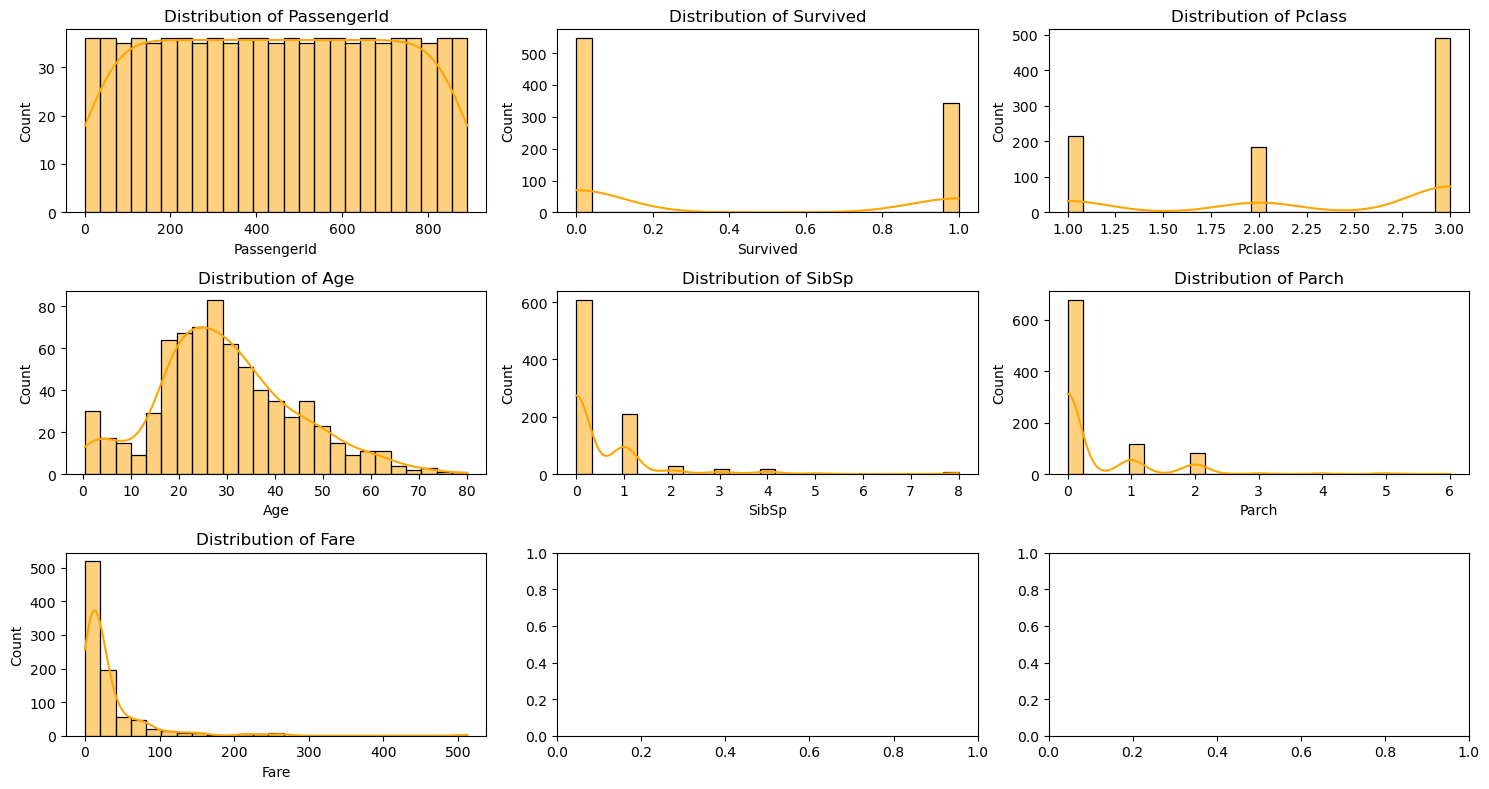

In [18]:
fig, axes = plt.subplots(3,3, figsize=(15, 8))

axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=25, color="Orange", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

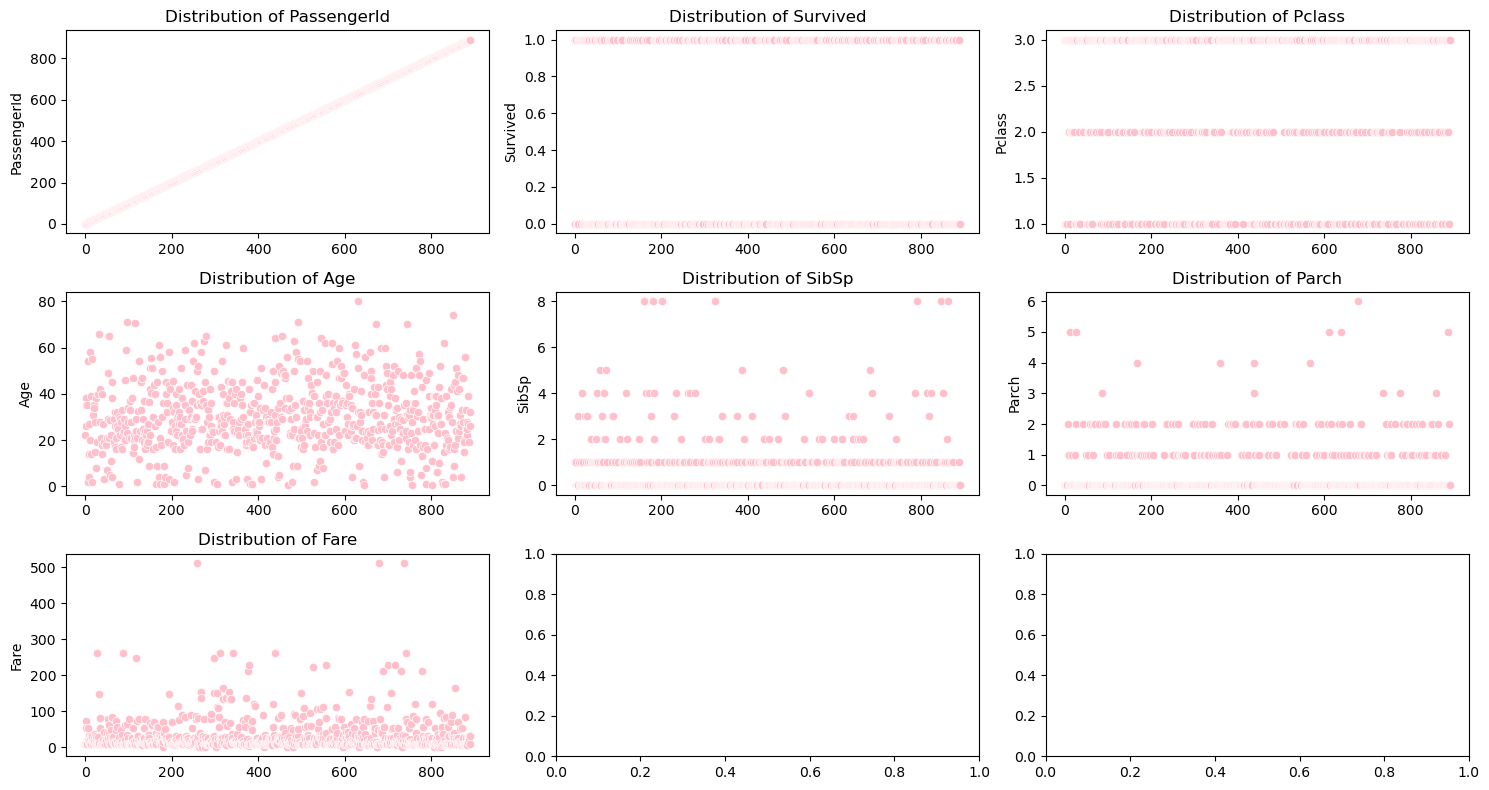

In [19]:
fig, axes = plt.subplots(3,3, figsize=(15, 8))

axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.scatterplot(df[col], color="Pink", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

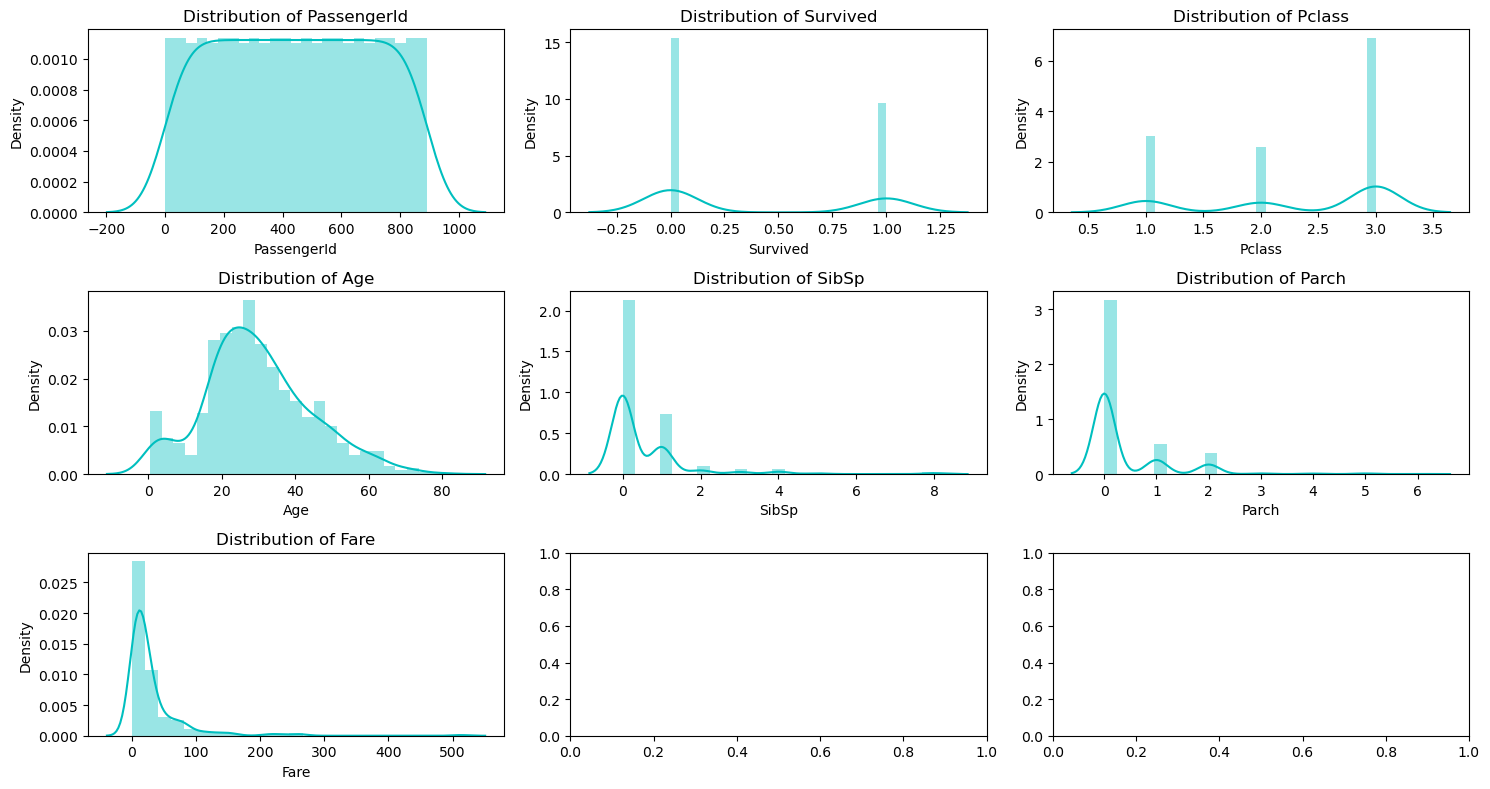

In [20]:
fig, axes = plt.subplots(3,3, figsize=(15, 8))

axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.distplot(df[col], kde=True, bins=25, color="c", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

#### CATEGORICAL COLUMN ANALYSIS

In [21]:
for col in cat_cols:
    print(f"\n{col} Analysis")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Value counts:\n{df[col].value_counts()}")
    print(f"Mode value: {df[col].mode()[0]}")
    print("_"*100)


Gender Analysis
Number of unique values: 2
Unique values: [1 0]
Value counts:
Gender
1    577
0    314
Name: count, dtype: int64
Mode value: 1
____________________________________________________________________________________________________

Ticket Analysis
Number of unique values: 681
Unique values: [523 596 669  49 472 275  85 395 344 132 616  38 535 333 413 153 480 151
 301 184 139 152 278  42 329 179  95 283 362 598 586 288 549 600  43 202
 514 302 186 507  53 391 634 282 617 462  76 190 377 249 522 587 239  29
  94 555 215 561 566 197  32 457 337 601 189 553 623 248 270 557 621 204
  80 347 355 473 158 432 304 311 280  25 637 247 676 652 297 298 341 678
 548 428 475 607 612 117 150 384 361 417 505 245 354 296 254 388 469   2
 193 274 491 176 666 460 585 540 219 463 541 196 318 380 640 537 111 552
 630  55 504 592 203 332 668 438 118 558 405 113 147 622  36 516 538 573
 595 418 654 258 568 470 559 323 265 423  28 576   5 659  90 412 488 593
 169 574 629 114 271  34 459  11 435 

#### VISUAL DISTRIBUTION FOR CATEGORICAL COLUMN

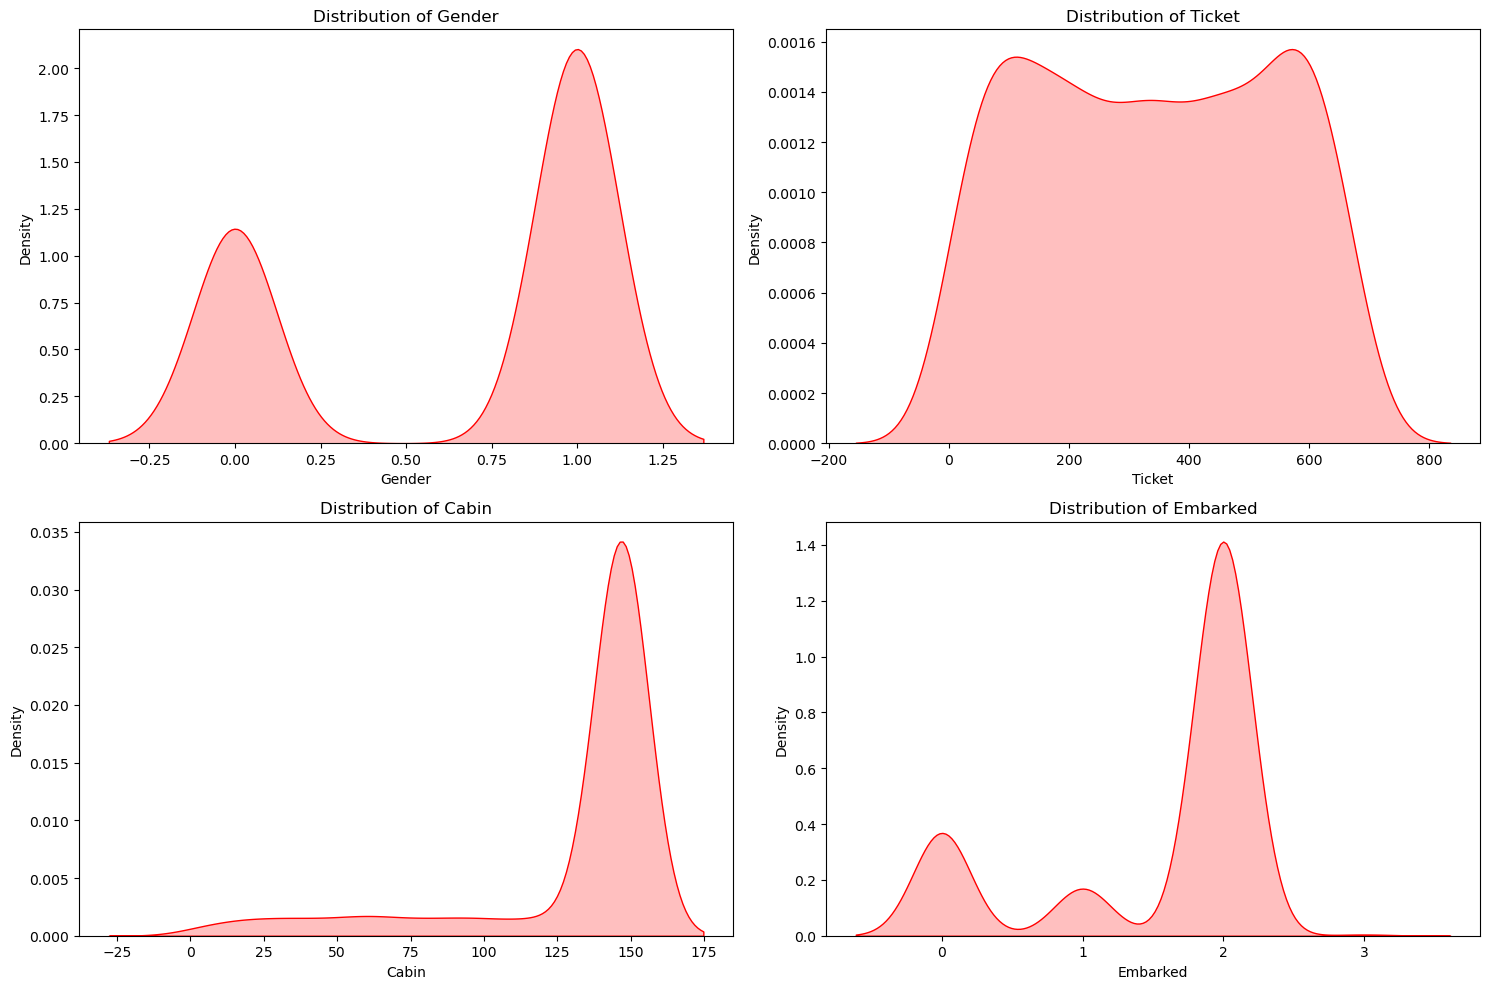

In [22]:
fig, axes = plt.subplots(2,2, figsize=(15, 10))

axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.kdeplot(df[col],fill=True,color="Red", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

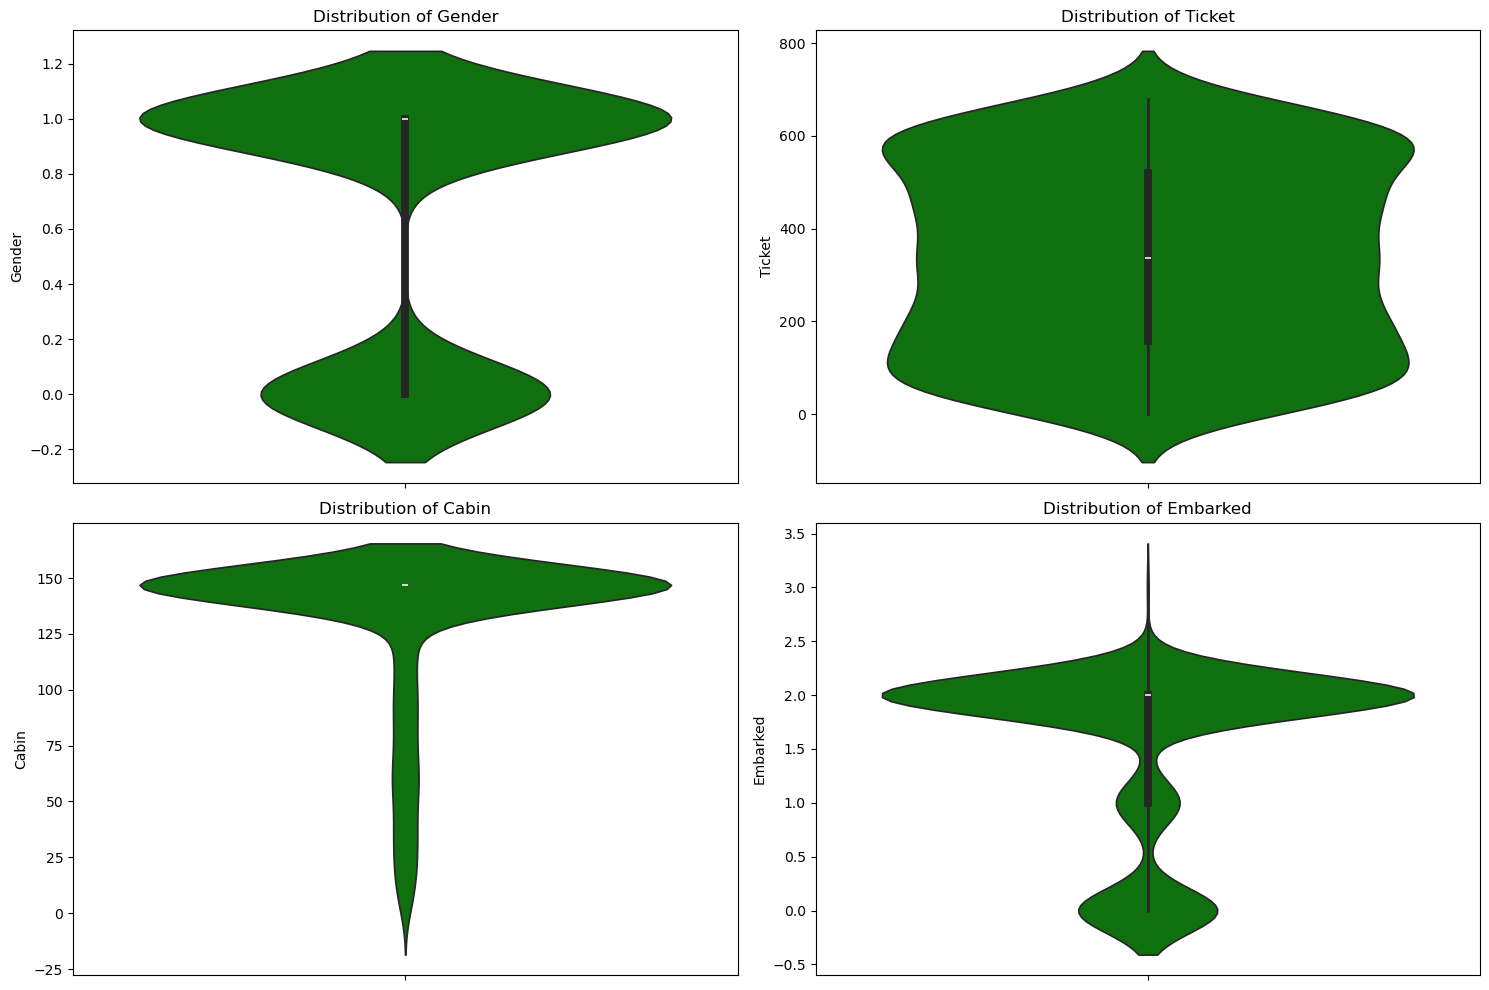

In [24]:
fig, axes = plt.subplots(2,2, figsize=(15, 10))

axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.violinplot(df[col],color="Green", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

#### UNIVARIATE ANALYSIS

In [25]:
class Univariate:
    def __init__(self, df):
        self.df = df
    
    def Univariate_plot(self):
        fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 

        sns.swarmplot(self.df["Fare"],color="seagreen", ax=axes[0, 0])
        axes[0, 0].set_title("Fare Distribution")

        sns.histplot(x=self.df["Survived"], bins=20, kde=True,color="seagreen", ax=axes[0, 1])
        axes[0, 1].set_title("Survived Distribution")

        sns.kdeplot(x=self.df["Ticket"],fill=True, color="seagreen", ax=axes[1, 0])
        axes[1, 0].set_title("Ticket Distribution")

        sns.stripplot(x=self.df["Cabin"],color="seagreen", ax=axes[1, 1])
        axes[1, 1].set_title("Cabin Distribution")

        plt.tight_layout()
        plt.show()


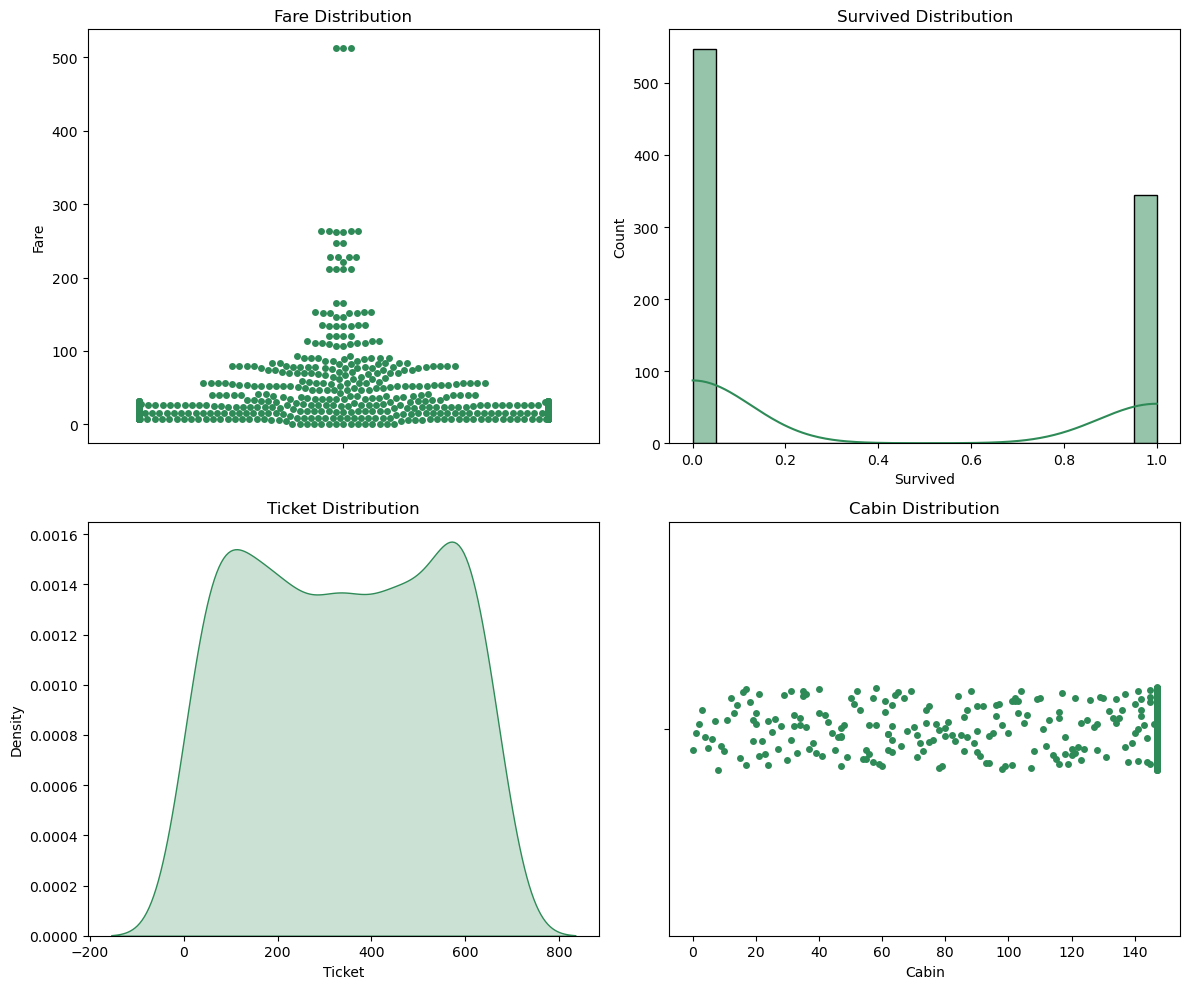

In [26]:
a = Univariate(df)
a.Univariate_plot()

#### MULTIVARIATE ANALYSIS

In [22]:
class multivariate:
    def __init__(self, df):
        self.df = df
    
    def multivariate_plot(self):
        fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 

        sns.kdeplot(x=df["Fare"], y=df["Cabin"], hue=df["Gender"],palette="Set2", ax=axes[0, 0])
        axes[0, 0].set_title("KDEPLOT")

        sns.stripplot(x=df["Gender"], y=df["Embarked"], hue=df["Gender"],palette="Set2", ax=axes[0, 1])
        axes[0, 1].set_title("STRIPPLOT")

        sns.barplot(x=df["Gender"], y=df["Parch"], hue=df["Gender"],palette="Set2", ax=axes[1, 0])
        axes[1, 0].set_title("BARPLOT")

        sns.stripplot(x=df["Cabin"], y=df["Ticket"], hue=df["Gender"],palette="Set2", ax=axes[1, 1])
        axes[1, 1].set_title("STRIPPLOT")

        plt.tight_layout()
        plt.show()


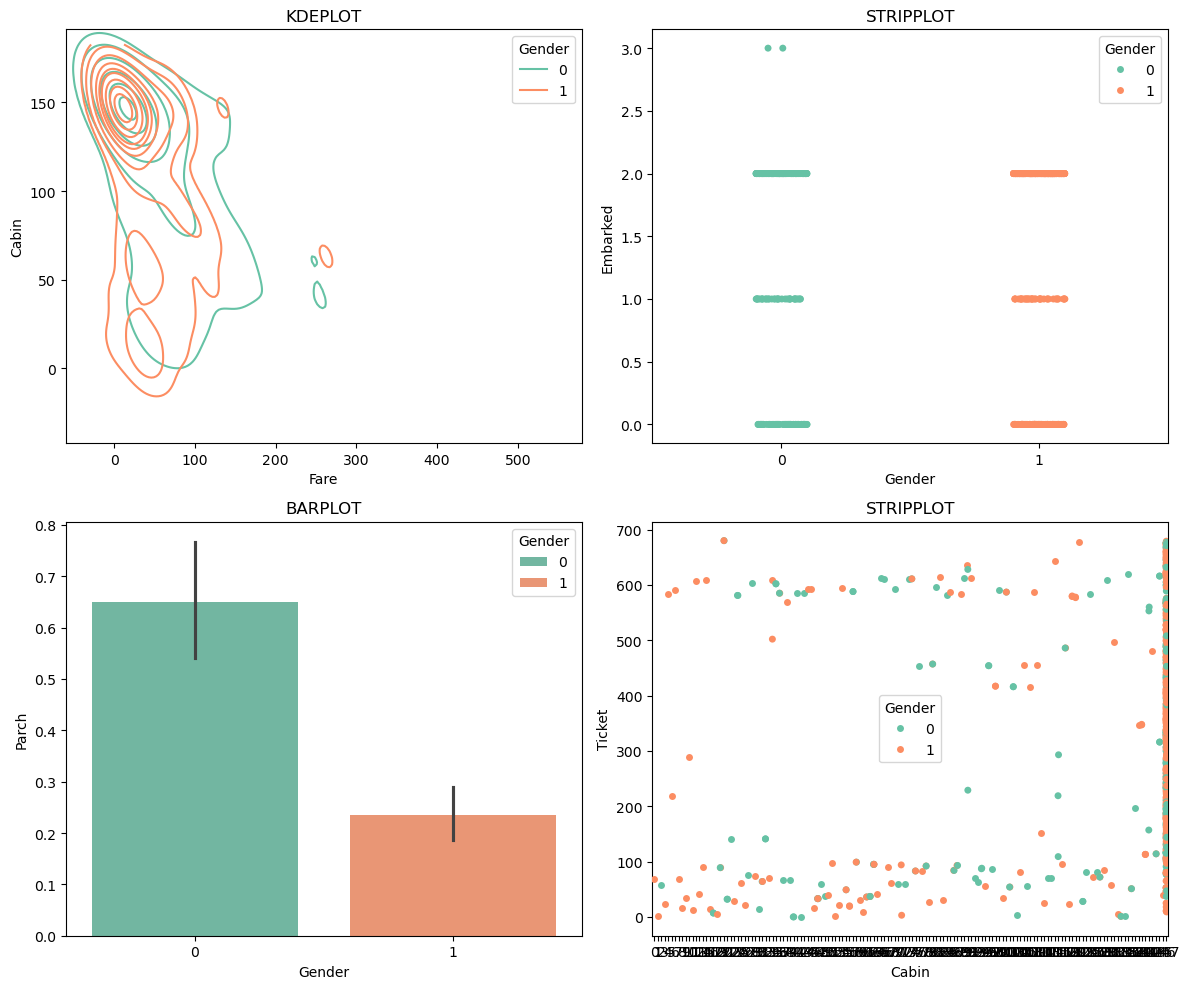

In [23]:
m = multivariate(df)
m.multivariate_plot()

#### MORE VIUSALS

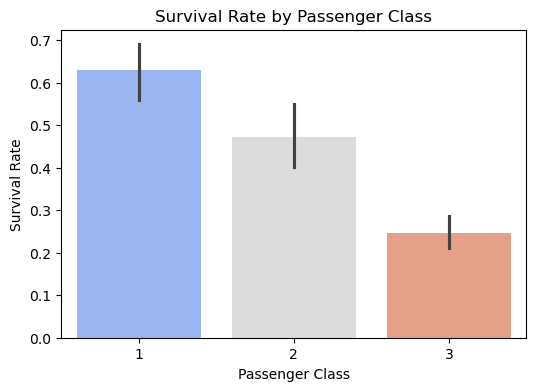

In [24]:
# 1. Survival rate by Passenger Class
plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

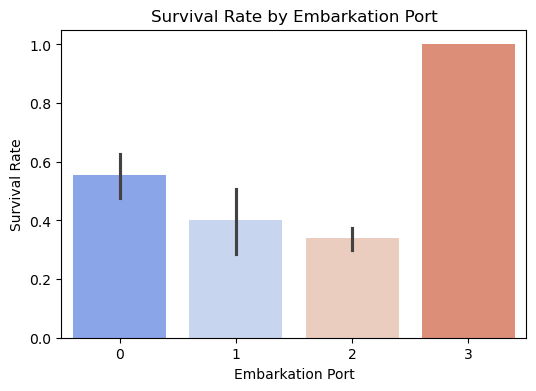

In [25]:
# 2. Survival rate by Embarkation Port
plt.figure(figsize=(6, 4))
sns.barplot(x="Embarked", y="Survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()

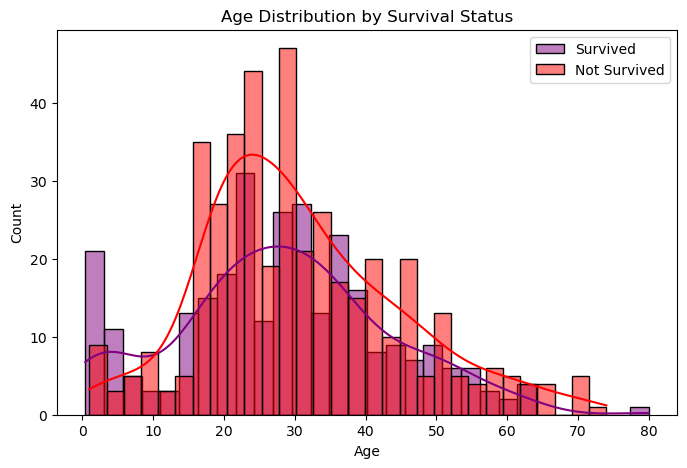

In [26]:
# 3. Age Distribution by Survival Status
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Survived"] == 1]["Age"], bins=30, kde=True, color="purple", label="Survived")
sns.histplot(df[df["Survived"] == 0]["Age"], bins=30, kde=True, color="red", label="Not Survived")
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.legend()
plt.show()

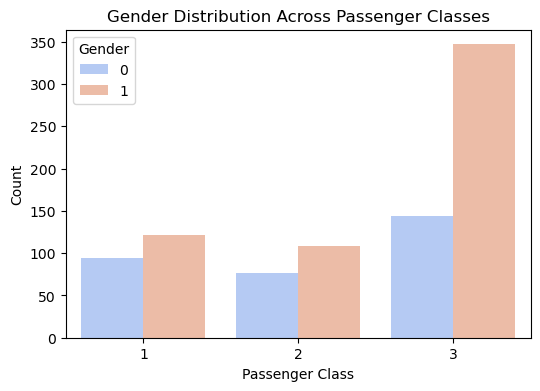

In [27]:
# 4. Gender Distribution across Passenger Classes
plt.figure(figsize=(6, 4))
sns.countplot(x="Pclass", hue=df["Gender"], data=df, palette="coolwarm")
plt.title("Gender Distribution Across Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

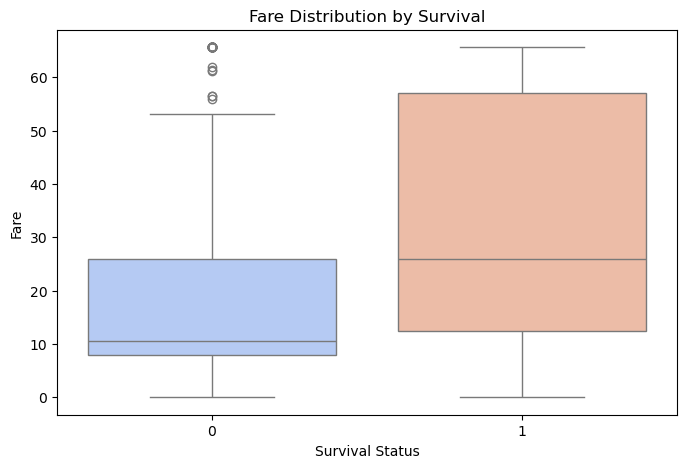

In [50]:
# 5. Fare Distribution by Survival
plt.figure(figsize=(8, 5))
sns.boxplot(x="Survived", y="Fare", data=df, palette="coolwarm")
plt.title("Fare Distribution by Survival")
plt.xlabel("Survival Status")
plt.ylabel("Fare")
plt.show()

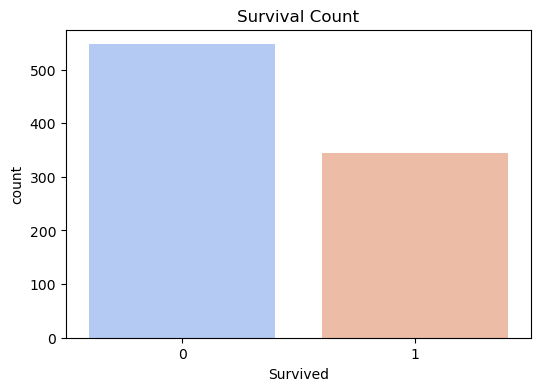

In [29]:
# 6. Survival count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette='coolwarm')
plt.title("Survival Count")
plt.show()

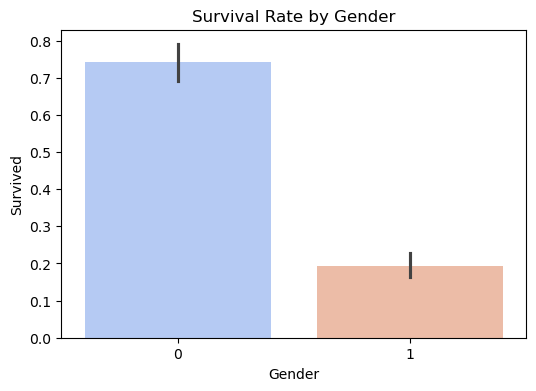

In [30]:
# 7. Survival rate by gender
plt.figure(figsize=(6,4))
sns.barplot(x=df["Gender"], y=df["Survived"], palette="coolwarm")
plt.title("Survival Rate by Gender")
plt.show()

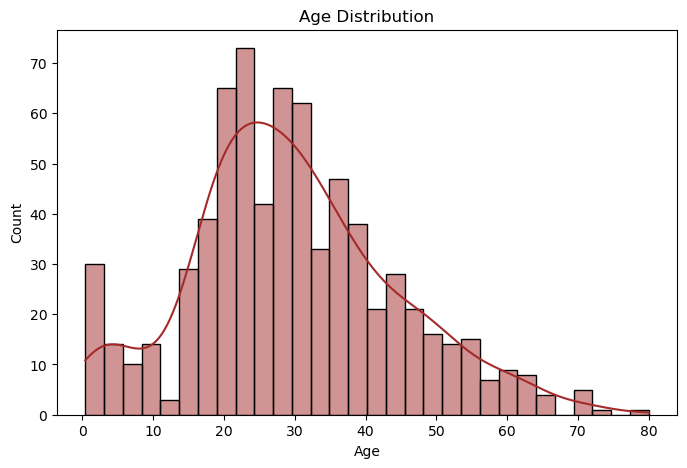

In [31]:
# 8. Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True,color="Brown")
plt.title("Age Distribution")
plt.show()

#### CORRELATION HEATMAP

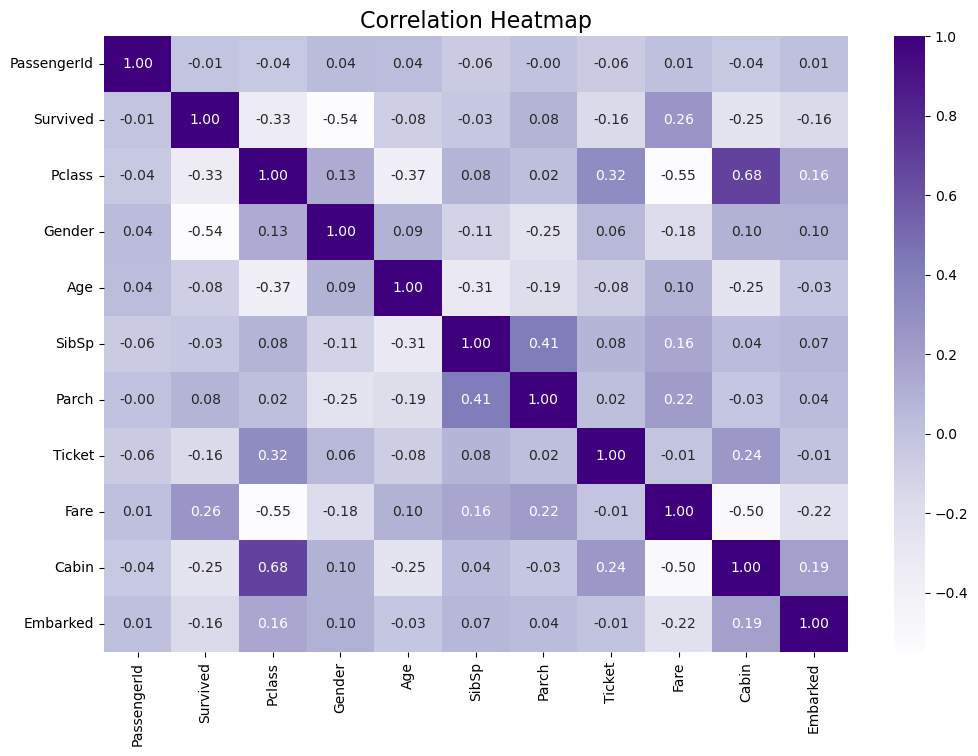

In [32]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Purples', cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

#### PAIRPLOT

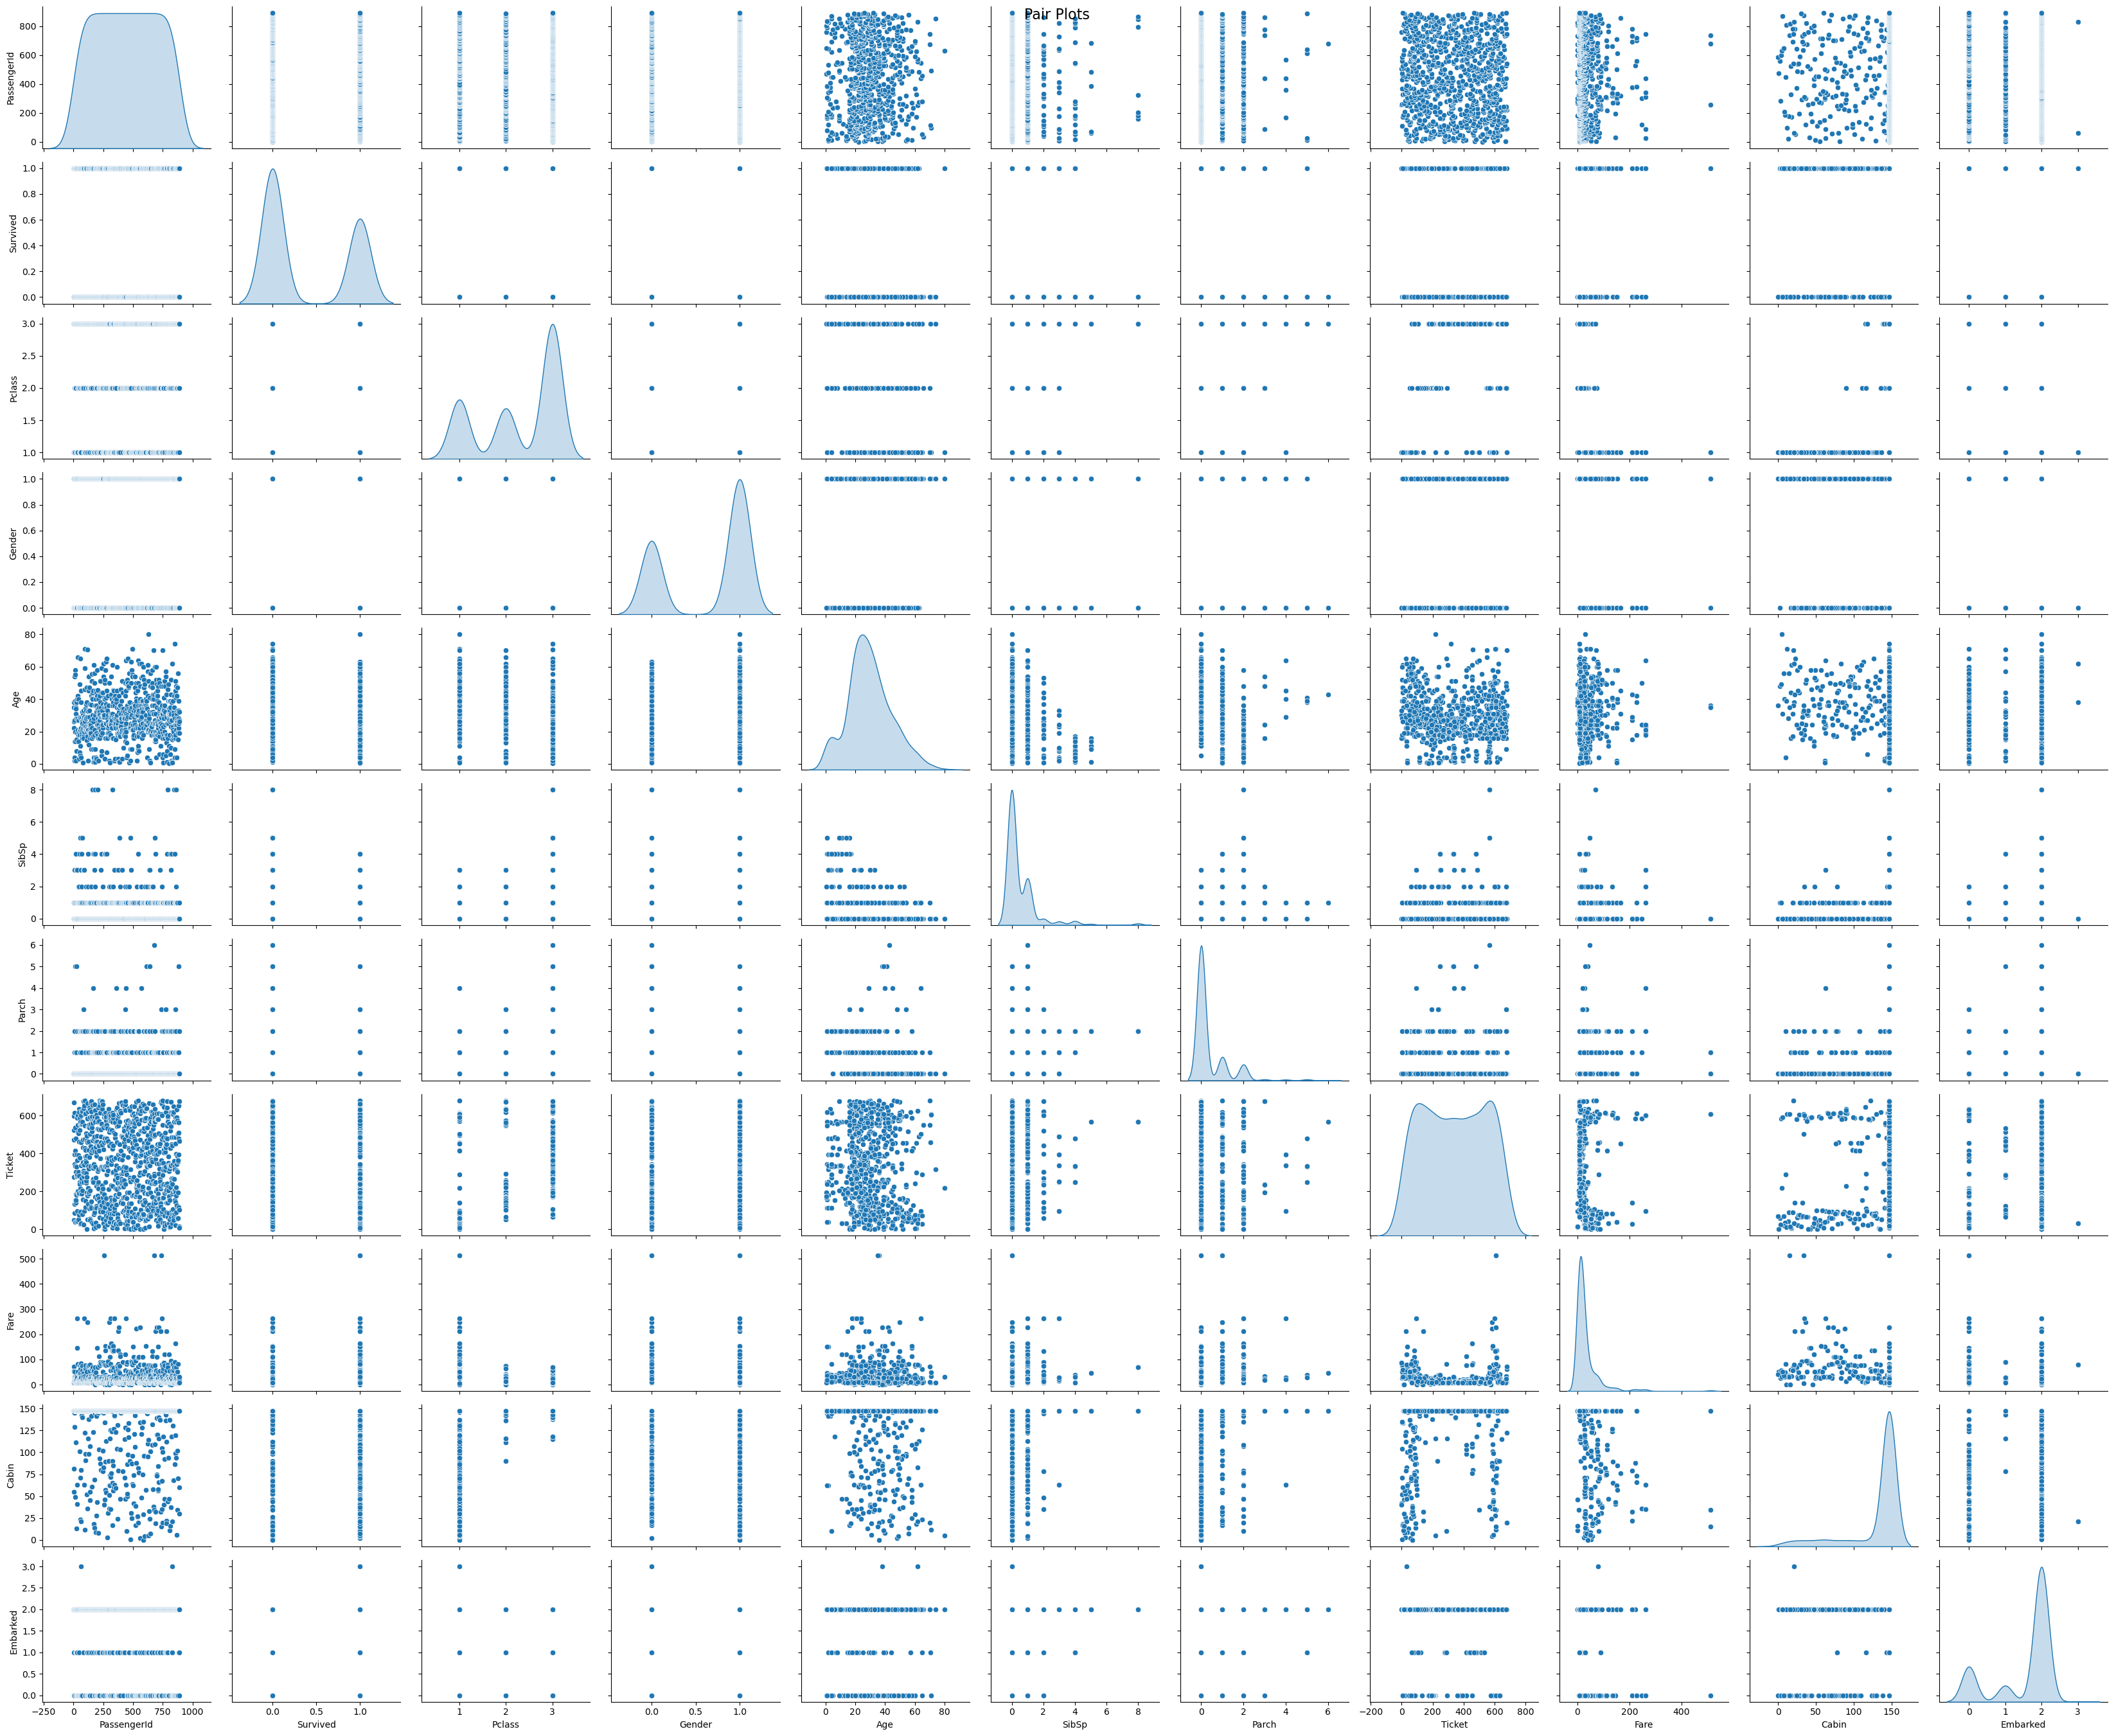

In [33]:
sns.pairplot(df, diag_kind="kde",aspect=1.2)
plt.suptitle("Pair Plots", fontsize=16)
plt.tight_layout()
plt.show()

#### OUTLIERS CHECKING

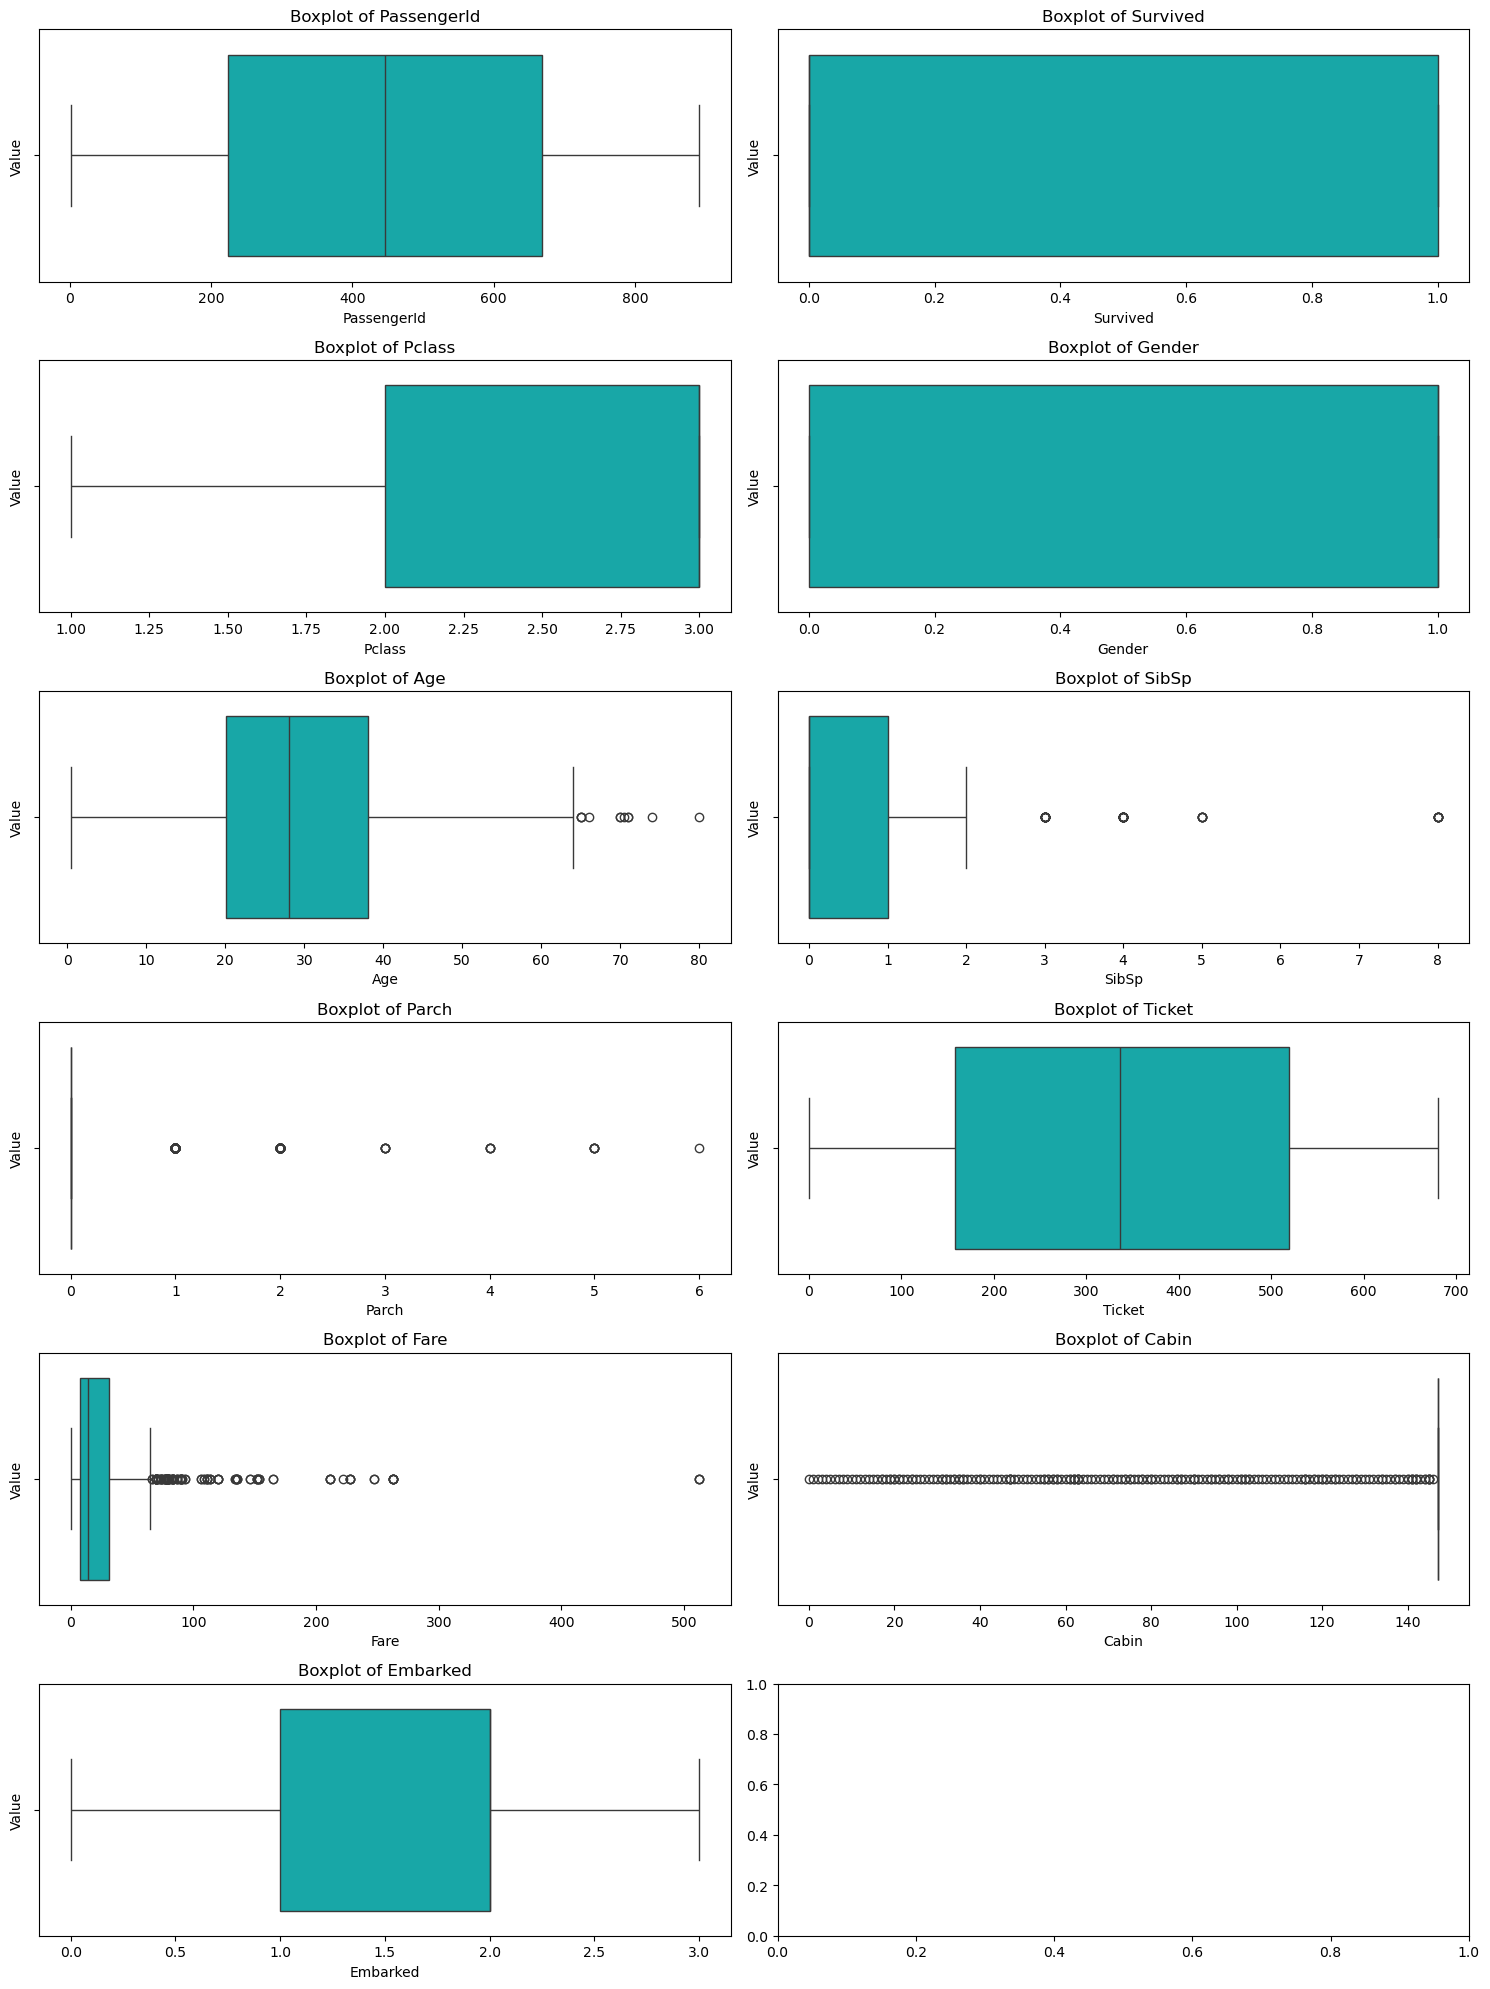

In [34]:
cols = df.columns

fig, axes = plt.subplots(6, 2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], color="c", ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()

#### HANDLING OUTLIERS

In [35]:
def Handling_Outliers(col):
    print(f"{col} : Outliers Checking")
    sns.boxplot(df[col], color = "m")
    plt.show()
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.50)
    q3 = df[col].quantile(0.75)
 
    iqr = q3 - q1
    print(f"IQR={iqr}")
    LowerTail = q1 - 1.5 * iqr
    UpperTail = q3 + 1.5 * iqr
    print(f"Lower Tail = {LowerTail}")
    print(f"Upper Tail = {UpperTail}")
    print("-"*80)
 
    Outliers = df[(df[col] < LowerTail) | (df[col] > UpperTail)]
    print(f"\nOutliers of {col} :\n{Outliers}")
 
    df.loc[(df[col] < LowerTail), col] = LowerTail
    df.loc[(df[col] > UpperTail), col] = UpperTail

Age : Outliers Checking


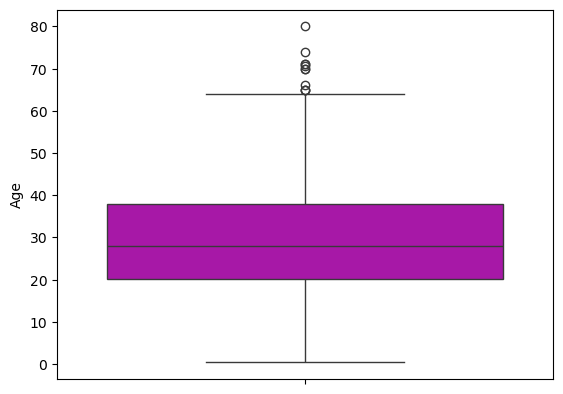

IQR=17.875
Lower Tail = -6.6875
Upper Tail = 64.8125
--------------------------------------------------------------------------------

Outliers of Age :
     PassengerId  Survived  Pclass  Gender   Age  SibSp  Parch  Ticket  \
33            34         0       2       1  66.0      0      0     549   
54            55         0       1       1  65.0      0      1      29   
96            97         0       1       1  71.0      0      0     607   
116          117         0       3       1  70.5      0      0     460   
280          281         0       3       1  65.0      0      0     290   
456          457         0       1       1  65.0      0      0      73   
493          494         0       1       1  71.0      0      0     603   
630          631         1       1       1  80.0      0      0     218   
672          673         0       2       1  70.0      0      0     550   
745          746         0       1       1  70.0      1      1     680   
851          852         0       

In [36]:
Handling_Outliers("Age")

SibSp : Outliers Checking


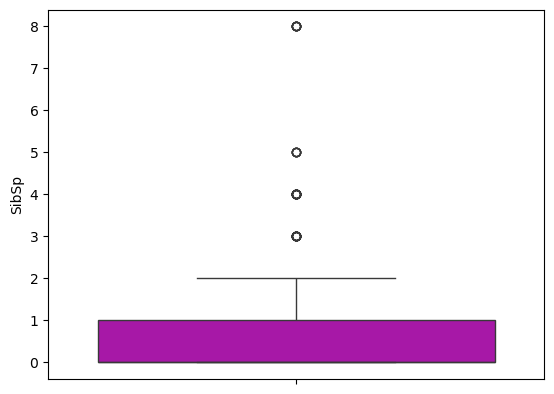

IQR=1.0
Lower Tail = -1.5
Upper Tail = 2.5
--------------------------------------------------------------------------------

Outliers of SibSp :
     PassengerId  Survived  Pclass  Gender   Age  SibSp  Parch  Ticket  \
7              8         0       3       1   2.0      3      1     395   
16            17         1       3       1   2.0      4      1     480   
24            25         0       3       0   8.0      3      1     395   
27            28         0       1       1  19.0      3      2      95   
50            51         0       3       1   7.0      4      1     249   
59            60         0       3       1  11.0      5      2     566   
63            64         0       3       1   4.0      3      2     337   
68            69         1       3       0  17.0      4      2     248   
71            72         0       3       0  16.0      5      2     566   
85            86         1       3       0  33.0      3      0     247   
88            89         1       1       

In [37]:
Handling_Outliers("SibSp")

Parch : Outliers Checking


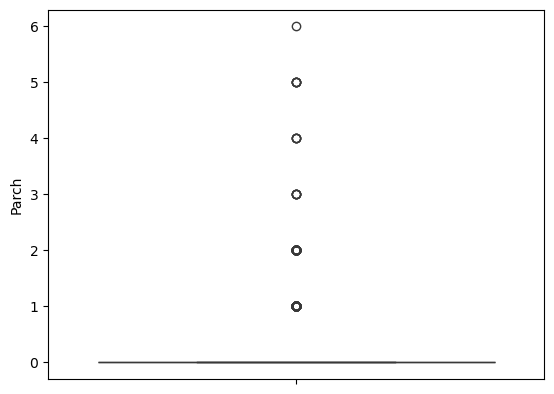

IQR=0.0
Lower Tail = 0.0
Upper Tail = 0.0
--------------------------------------------------------------------------------

Outliers of Parch :
     PassengerId  Survived  Pclass  Gender   Age  SibSp  Parch  Ticket  \
7              8         0       3       1   2.0    2.5      1     395   
8              9         1       3       0  27.0    0.0      2     344   
10            11         1       3       0   4.0    1.0      1     616   
13            14         0       3       1  39.0    1.0      5     333   
16            17         1       3       1   2.0    2.5      1     480   
..           ...       ...     ...     ...   ...    ...    ...     ...   
871          872         1       1       0  47.0    1.0      1      54   
879          880         1       1       0  56.0    0.0      1      59   
880          881         1       2       0  25.0    0.0      1     115   
885          886         0       3       0  39.0    0.0      5     480   
888          889         0       3       0

In [38]:
Handling_Outliers("Parch")

Fare : Outliers Checking


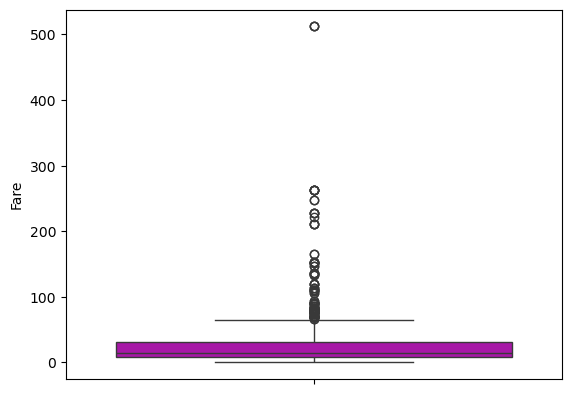

IQR=23.0896
Lower Tail = -26.724
Upper Tail = 65.6344
--------------------------------------------------------------------------------

Outliers of Fare :
     PassengerId  Survived  Pclass  Gender   Age  SibSp  Parch  Ticket  \
1              2         1       1       0  38.0    1.0      0     596   
27            28         0       1       1  19.0    2.5      0      95   
31            32         1       1       0   NaN    1.0      0     586   
34            35         0       1       1  28.0    1.0      0     600   
52            53         1       1       0  49.0    1.0      0     587   
..           ...       ...     ...     ...   ...    ...    ...     ...   
846          847         0       3       1   NaN    2.5      0     568   
849          850         1       1       0   NaN    1.0      0      84   
856          857         1       1       0  45.0    1.0      0     453   
863          864         0       3       0   NaN    2.5      0     568   
879          880         1     

In [39]:
Handling_Outliers("Fare")

Cabin : Outliers Checking


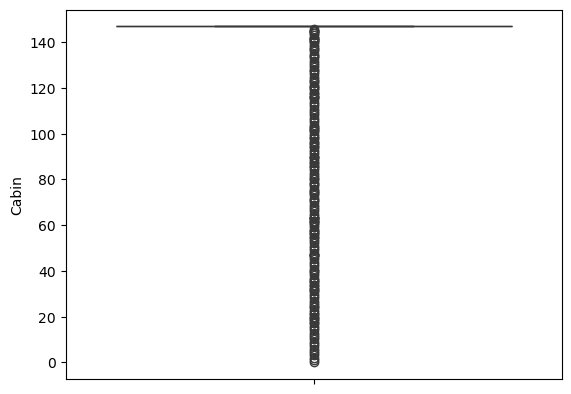

IQR=0.0
Lower Tail = 147.0
Upper Tail = 147.0
--------------------------------------------------------------------------------

Outliers of Cabin :
     PassengerId  Survived  Pclass  Gender   Age  SibSp  Parch  Ticket  \
1              2         1       1       0  38.0    1.0      0     596   
3              4         1       1       0  35.0    1.0      0      49   
6              7         0       1       1  54.0    0.0      0      85   
10            11         1       3       0   4.0    1.0      0     616   
11            12         1       1       0  58.0    0.0      0      38   
..           ...       ...     ...     ...   ...    ...    ...     ...   
871          872         1       1       0  47.0    1.0      0      54   
872          873         0       1       1  33.0    0.0      0     502   
879          880         1       1       0  56.0    0.0      0      59   
887          888         1       1       0  19.0    0.0      0      14   
889          890         1       1    

In [40]:
Handling_Outliers("Cabin")

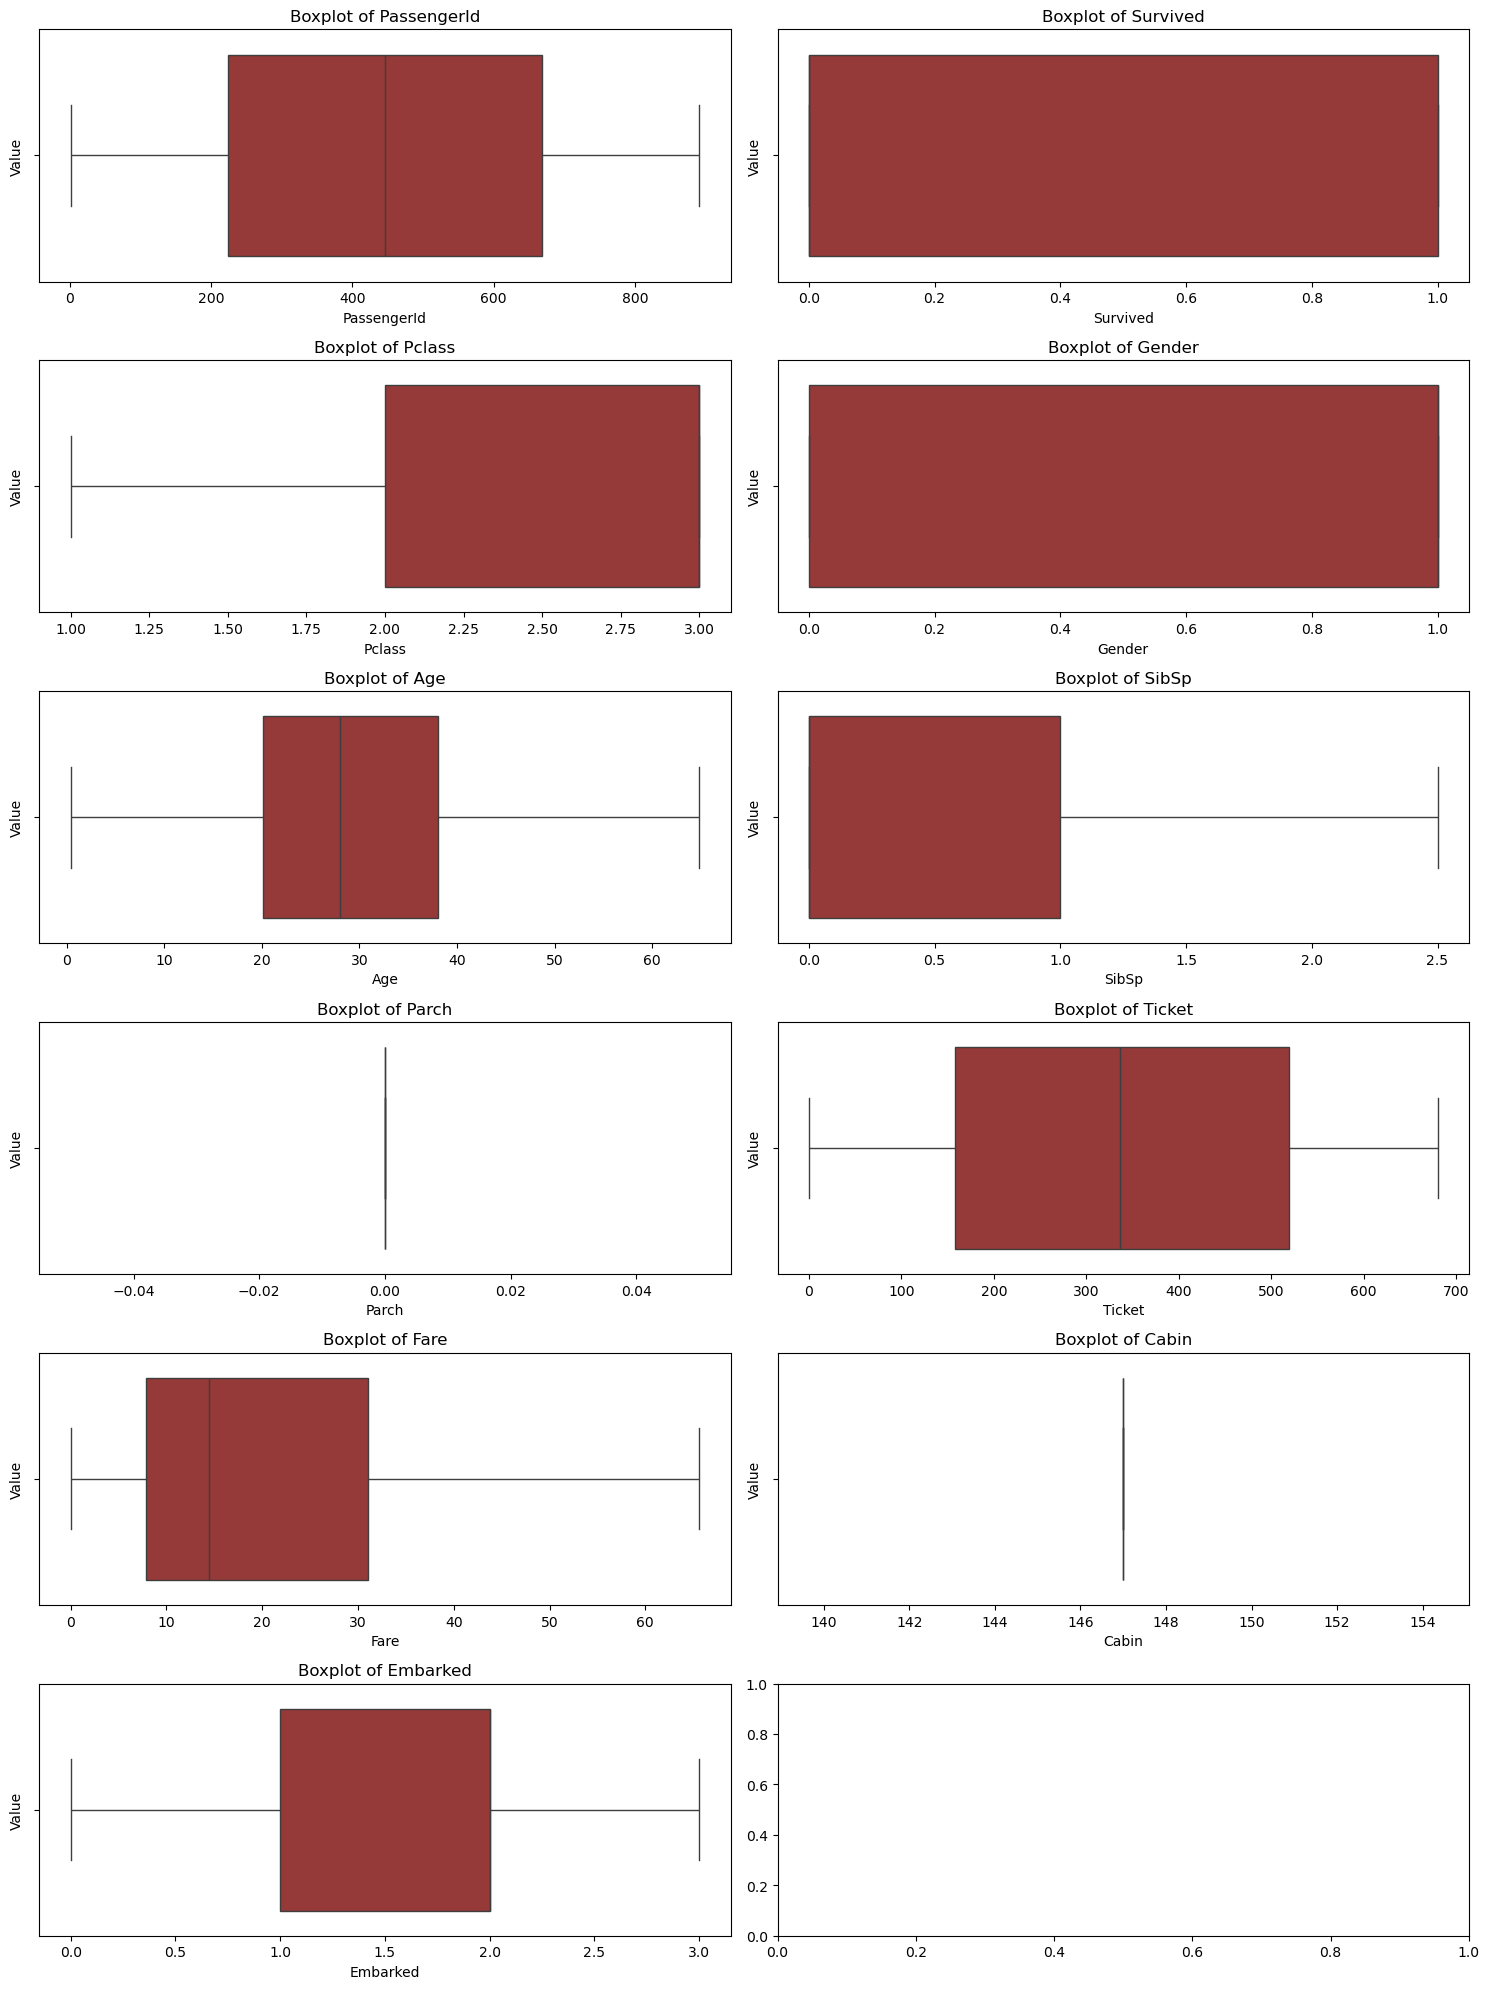

In [41]:
cols = df.columns

fig, axes = plt.subplots(6, 2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], color="Brown", ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()

#### TRAIN TEST SPLIT

In [42]:
x = df.drop(columns=["Embarked"])
y = df["Embarked"]

In [43]:
x.head()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,1,22.0,1.0,0,523,7.2500,147
1,2,1,1,0,38.0,1.0,0,596,65.6344,147
2,3,1,3,0,26.0,0.0,0,669,7.9250,147
3,4,1,1,0,35.0,1.0,0,49,53.1000,147
4,5,0,3,1,35.0,0.0,0,472,8.0500,147


In [44]:
y.head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int32

In [45]:
xtrain,ytrain,xtest,ytest = train_test_split(x,y,test_size=0.2,random_state=20)

In [46]:
xtrain.shape

(712, 10)

In [47]:
ytrain.shape

(179, 10)

In [48]:
xtest.shape

(712,)

In [49]:
ytest.shape

(179,)